In [705]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [706]:
df = pd.read_csv('heart.csv')

In [707]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [709]:
df.shape

(303, 14)

In [710]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [711]:
# for col in df.columns:
#     df[col].plot(kind = 'box')
#     plt.show()

In [712]:
features = df.columns.drop('target')
target = 'target'
# df.head()

In [713]:
from sklearn.model_selection import train_test_split

In [714]:
x_train, x_test , y_train, y_test = train_test_split(df[features], df[target], test_size= 0.2, random_state= 11)

### using Mimax scaler

In [715]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mm = MinMaxScaler()
sc = StandardScaler()
x_train_scaled_mm = mm.fit_transform(x_train)
x_train_scaled_sc = sc.fit_transform(x_train)

In [716]:
x_test_scaled_mm = mm.transform(x_test)
x_test_scaled_sc = sc.transform(x_test)

## Logistics Regression

In [717]:
from sklearn.linear_model import LogisticRegression

In [718]:
lr = LogisticRegression()

In [719]:
lr.fit(x_train_scaled_mm, y_train)  # for min max scaler



LogisticRegression()

In [720]:
y_pred_train = lr.predict(x_train_scaled_mm)
y_pred_test = lr.predict(x_test_scaled_mm)

In [721]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [722]:
print('Accuracy using Minmax scaler')
print('-------------------------------')


print('training accuracy is', accuracy_score(y_pred_train, y_train))
print('testing accuracy is', accuracy_score(y_pred_test, y_test))


Accuracy using Minmax scaler
-------------------------------
training accuracy is 0.859504132231405
testing accuracy is 0.8032786885245902


In [723]:
lr = LogisticRegression() # for standard scaler
lr.fit(x_train_scaled_sc, y_train)  

LogisticRegression()

In [724]:
y_pred_train = lr.predict(x_train_scaled_sc)
y_pred_test = lr.predict(x_test_scaled_sc)

In [725]:
print('Accuracy using standard scaler')
print('-------------------------------')


print('training accuracy is', accuracy_score(y_pred_train, y_train))
print('testing accuracy is', accuracy_score(y_pred_test, y_test))


Accuracy using standard scaler
-------------------------------
training accuracy is 0.8677685950413223
testing accuracy is 0.8032786885245902


## Decision Tree

In [726]:
from sklearn.tree import DecisionTreeClassifier

In [727]:
dc = DecisionTreeClassifier(random_state= 10)

In [728]:
dc.fit(x_train, y_train)  # without scaling features

DecisionTreeClassifier(random_state=10)

In [729]:
y_pred_train = dc.predict(x_train)
y_pred_test = dc.predict(x_test)

In [730]:
print('Accuracy using Decision Tree')
print('-------------------------------')


print('training accuracy is', accuracy_score(y_pred_train, y_train))
print('testing accuracy is', accuracy_score(y_pred_test, y_test))

print('training accuracy from model.score is', dc.score(x_train, y_train))
print('testing accuracy is from model.score is', dc.score(x_test, y_test))

Accuracy using Decision Tree
-------------------------------
training accuracy is 1.0
testing accuracy is 0.7213114754098361
training accuracy from model.score is 1.0
testing accuracy is from model.score is 0.7213114754098361


In [731]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [732]:
from sklearn import tree

In [733]:
# plt.figure(figsize=(20,20))
# features = df.columns
# classes = ['Not Heart Diseases ', ' Heart Disease ']
# tree.plot_tree(dc , feature_names= features , class_names= classes , filled=True, fontsize= 15)
# plt.show()

## Hyperparameter tuning 

In [734]:
params = {
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2]
}

In [735]:
clf  = DecisionTreeClassifier()

In [736]:
from sklearn.model_selection import GridSearchCV 

In [737]:
gcv = GridSearchCV(estimator= clf, param_grid= params)
gcv.fit(x_train, y_train)
gcv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=3)

In [738]:
model_gcv = gcv.best_estimator_
model_gcv.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=3)

In [739]:
y_pred_train = model_gcv.predict(x_train)
y_pred_test = model_gcv.predict(x_test)

In [740]:
print('Accuracy using Decision Tree with Hyperparameter tuning')
print('-------------------------------')


print('training accuracy is', accuracy_score(y_pred_train, y_train))
print('testing accuracy is', accuracy_score(y_pred_test, y_test))


Accuracy using Decision Tree with Hyperparameter tuning
-------------------------------
training accuracy is 0.9669421487603306
testing accuracy is 0.7868852459016393


In [741]:
# plt.figure(figsize=(20,20))
# features = df.columns
# classes = ['Not Heart Diseases ', ' Heart Disease ']
# tree.plot_tree(model_gcv , feature_names= features , class_names= classes , filled=True , fontsize= 15)
# plt.show()

In [742]:
path=clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print(ccp_alphas)
print(max(ccp_alphas))

[0.         0.00321396 0.00385675 0.00550964 0.00550964 0.00619835
 0.00644142 0.00661157 0.00674931 0.00734619 0.00743802 0.00762285
 0.0077135  0.00777832 0.00864826 0.01140955 0.01269517 0.01617938
 0.03530798 0.04073691 0.04405227 0.14840579]
0.1484057948774865


In [743]:
print(ccp_alphas)
print('-------------')
print(max(ccp_alphas))

[0.         0.00321396 0.00385675 0.00550964 0.00550964 0.00619835
 0.00644142 0.00661157 0.00674931 0.00734619 0.00743802 0.00762285
 0.0077135  0.00777832 0.00864826 0.01140955 0.01269517 0.01617938
 0.03530798 0.04073691 0.04405227 0.14840579]
-------------
0.1484057948774865


In [744]:
ccfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    ccfs.append(clf)

In [745]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_pred_train = clf_.predict(x_train)
y_pred_test = clf_.predict(x_test)



In [746]:
print('Accuracy using Decision Tree with cost complexity')
print('-------------------------------')


print('training accuracy is', accuracy_score(y_pred_train, y_train))
print('testing accuracy is', accuracy_score(y_pred_test, y_test))


Accuracy using Decision Tree with cost complexity
-------------------------------
training accuracy is 0.8429752066115702
testing accuracy is 0.7540983606557377


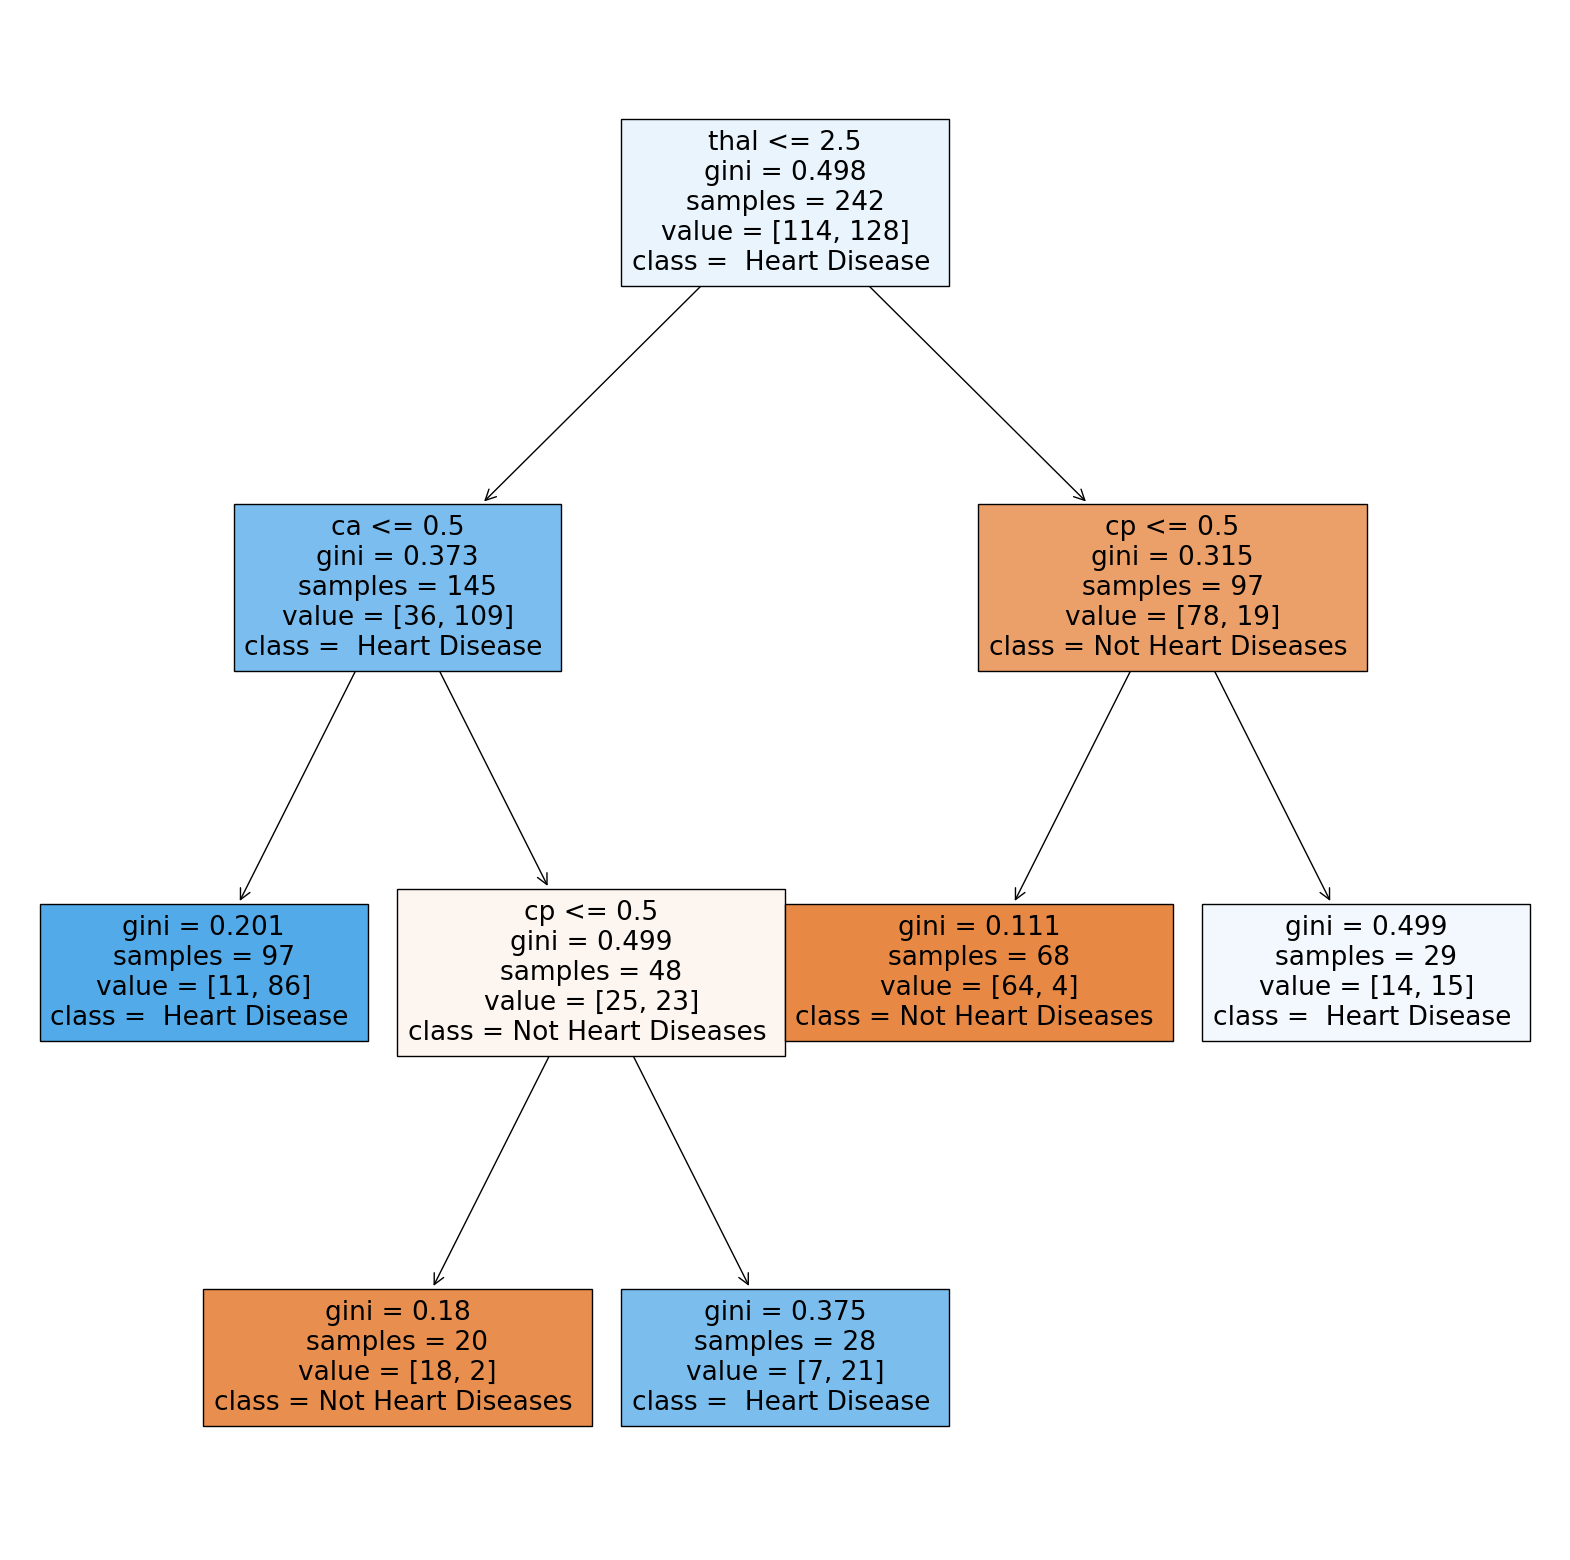

In [747]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not Heart Diseases ', ' Heart Disease ']
tree.plot_tree(clf_ , feature_names= features , class_names= classes , filled=True)
plt.show()

In [748]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report


In [749]:
model_rf=RandomForestClassifier()

In [750]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [751]:
y_pred_train =model_rf.predict(x_train)
y_pred_test =model_rf.predict(x_test)


In [752]:
print('Accuracy using Random Forest ')
print('-------------------------------')


print('training accuracy is', accuracy_score(y_pred_train, y_train))
print('testing accuracy is', accuracy_score(y_pred_test, y_test))


Accuracy using Random Forest 
-------------------------------
training accuracy is 1.0
testing accuracy is 0.7868852459016393
